# **This Notebook is divided into 2 Sections**

1. *In first, graphs and pie chart are used to represent relation among columns as a whole dataset*
2. *In other section Data has been analysed on the basis of a particular job profile*



## ***Basic Code***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cd '/content/drive/My Drive/ML Projects/MusicSentimentAnalysis/'

In [ ]:
!pip install wordcloud

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme()
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv('/content/drive/My Drive/ML Projects/MusicSentimentAnalysis/alldata.csv')
df.head()

position  ...            location
0                               Development Director  ...  Atlanta, GA 30301 
1  An Ostentatiously-Excitable Principal Research...  ...         Atlanta, GA
2                                     Data Scientist  ...         Atlanta, GA
3                                       Data Analyst  ...  Atlanta, GA 30303 
4  Assistant Professor -TT - Signal Processing & ...  ...         Atlanta, GA

[5 rows x 5 columns]

In [ ]:
df.columns

Index(['position', 'company', 'description', 'reviews', 'location'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 272.2+ KB


In [ ]:
df.describe(include='all')

position     company  ...        reviews     location
count             6953        6953  ...    5326.000000         6953
unique            5242        2213  ...            NaN          382
top     Data Scientist  Amazon.com  ...            NaN  Seattle, WA
freq               351         358  ...            NaN          563
mean               NaN         NaN  ...    3179.089185          NaN
std                NaN         NaN  ...    8448.515056          NaN
min                NaN         NaN  ...       2.000000          NaN
25%                NaN         NaN  ...      27.000000          NaN
50%                NaN         NaN  ...     230.000000          NaN
75%                NaN         NaN  ...    1578.000000          NaN
max                NaN         NaN  ...  148114.000000          NaN

[11 rows x 5 columns]

In [ ]:
print(df.company.isnull().value_counts())
print(df.reviews.isnull().value_counts())
print(df.location.isnull().value_counts())
print(df.reviews.isnull().value_counts())

False    6953
True       11
Name: company, dtype: int64
False    5326
True     1638
Name: reviews, dtype: int64
False    6953
True       11
Name: location, dtype: int64
False    5326
True     1638
Name: reviews, dtype: int64


In [ ]:
df["reviews"]=df["reviews"].fillna(0)
df=df.dropna(subset=["position",'company','location',"description"])
df["city"]=df.location.str.split(',',expand=True).iloc[:,0]
df["state"]=df.location.str.split(' ',expand=True).iloc[:,1]

In [ ]:
def split_text(texts):
    wordslist=[]
    for word in texts:
        wordslist.append(word.split())
    new_list=[]
    for listt in wordslist:
        new_list=new_list+listt
    text=" ".join(new_list)
    return text 



---



#***First Section***






---



### **Vacancies per Job Profile**

*  From this we can conclude that Data Scientist Profile has maximum number of vacancies available upto 350




(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 9 Text major ticklabel objects>)

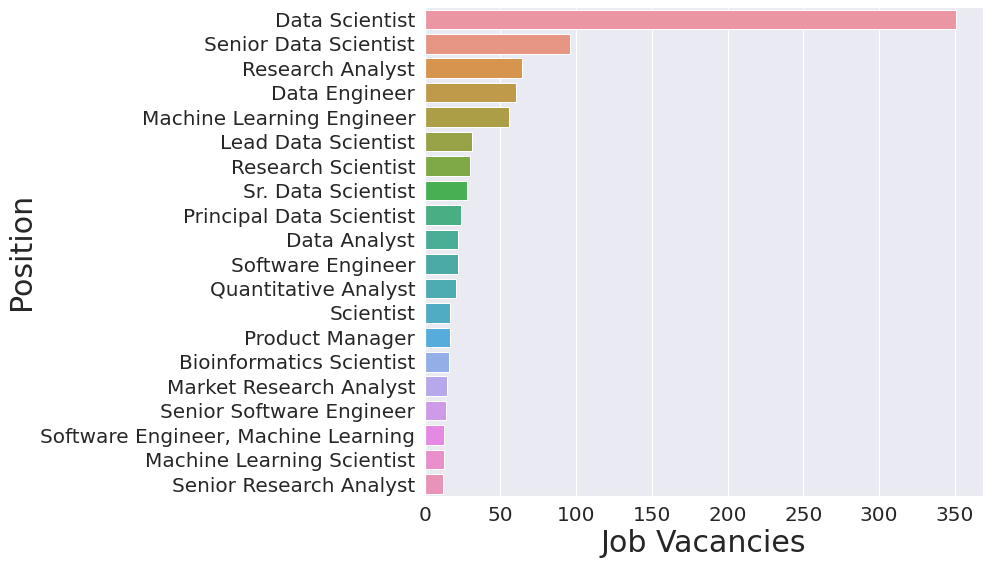

In [ ]:
df1=df.groupby(by="position").size().reset_index(name="Job vacancies").sort_values(by="Job vacancies",ascending=False)
plt.figure(figsize=(10,9))
sns.barplot(y="position",x="Job vacancies",data=df1.head(20))
plt.yticks(size=20)
plt.ylabel("Position",size=30)
plt.xlabel("Job Vacancies",size=30)
plt.xticks(size=20)

### **Vacancies per position in a State**

* From this we can conclude that Maximum number of vacancies are in New York of Data Scientist Profile




(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

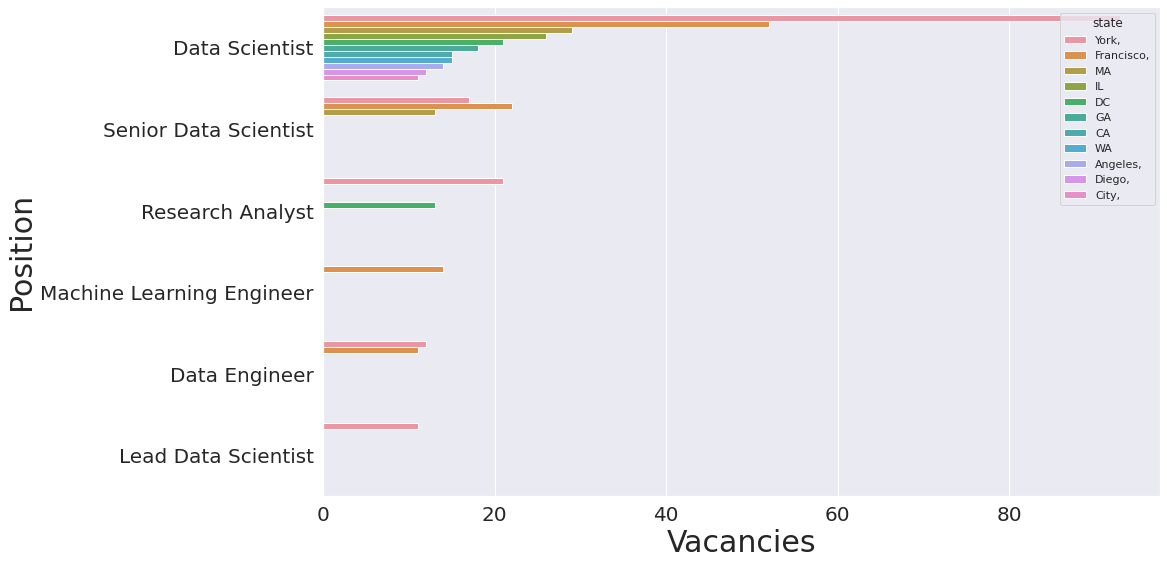

In [ ]:
df1=df.groupby(by=["position","state"]).size().reset_index(name="vacancy").sort_values(by="vacancy",ascending=False)
plt.figure(figsize=(15,9))
sns.barplot(x="vacancy",y="position",data=df1.head(20),hue="state")
plt.yticks(size=20)
plt.ylabel("Position",size=30)
plt.xlabel("Vacancies",size=30)
plt.xticks(size=20)

### **Vacancies per Company in a State**

* From this we can conclude that Amazon Company in Washington has maximum vacancies among other companies



(array([  0.,  50., 100., 150., 200., 250.]),
 <a list of 6 Text major ticklabel objects>)

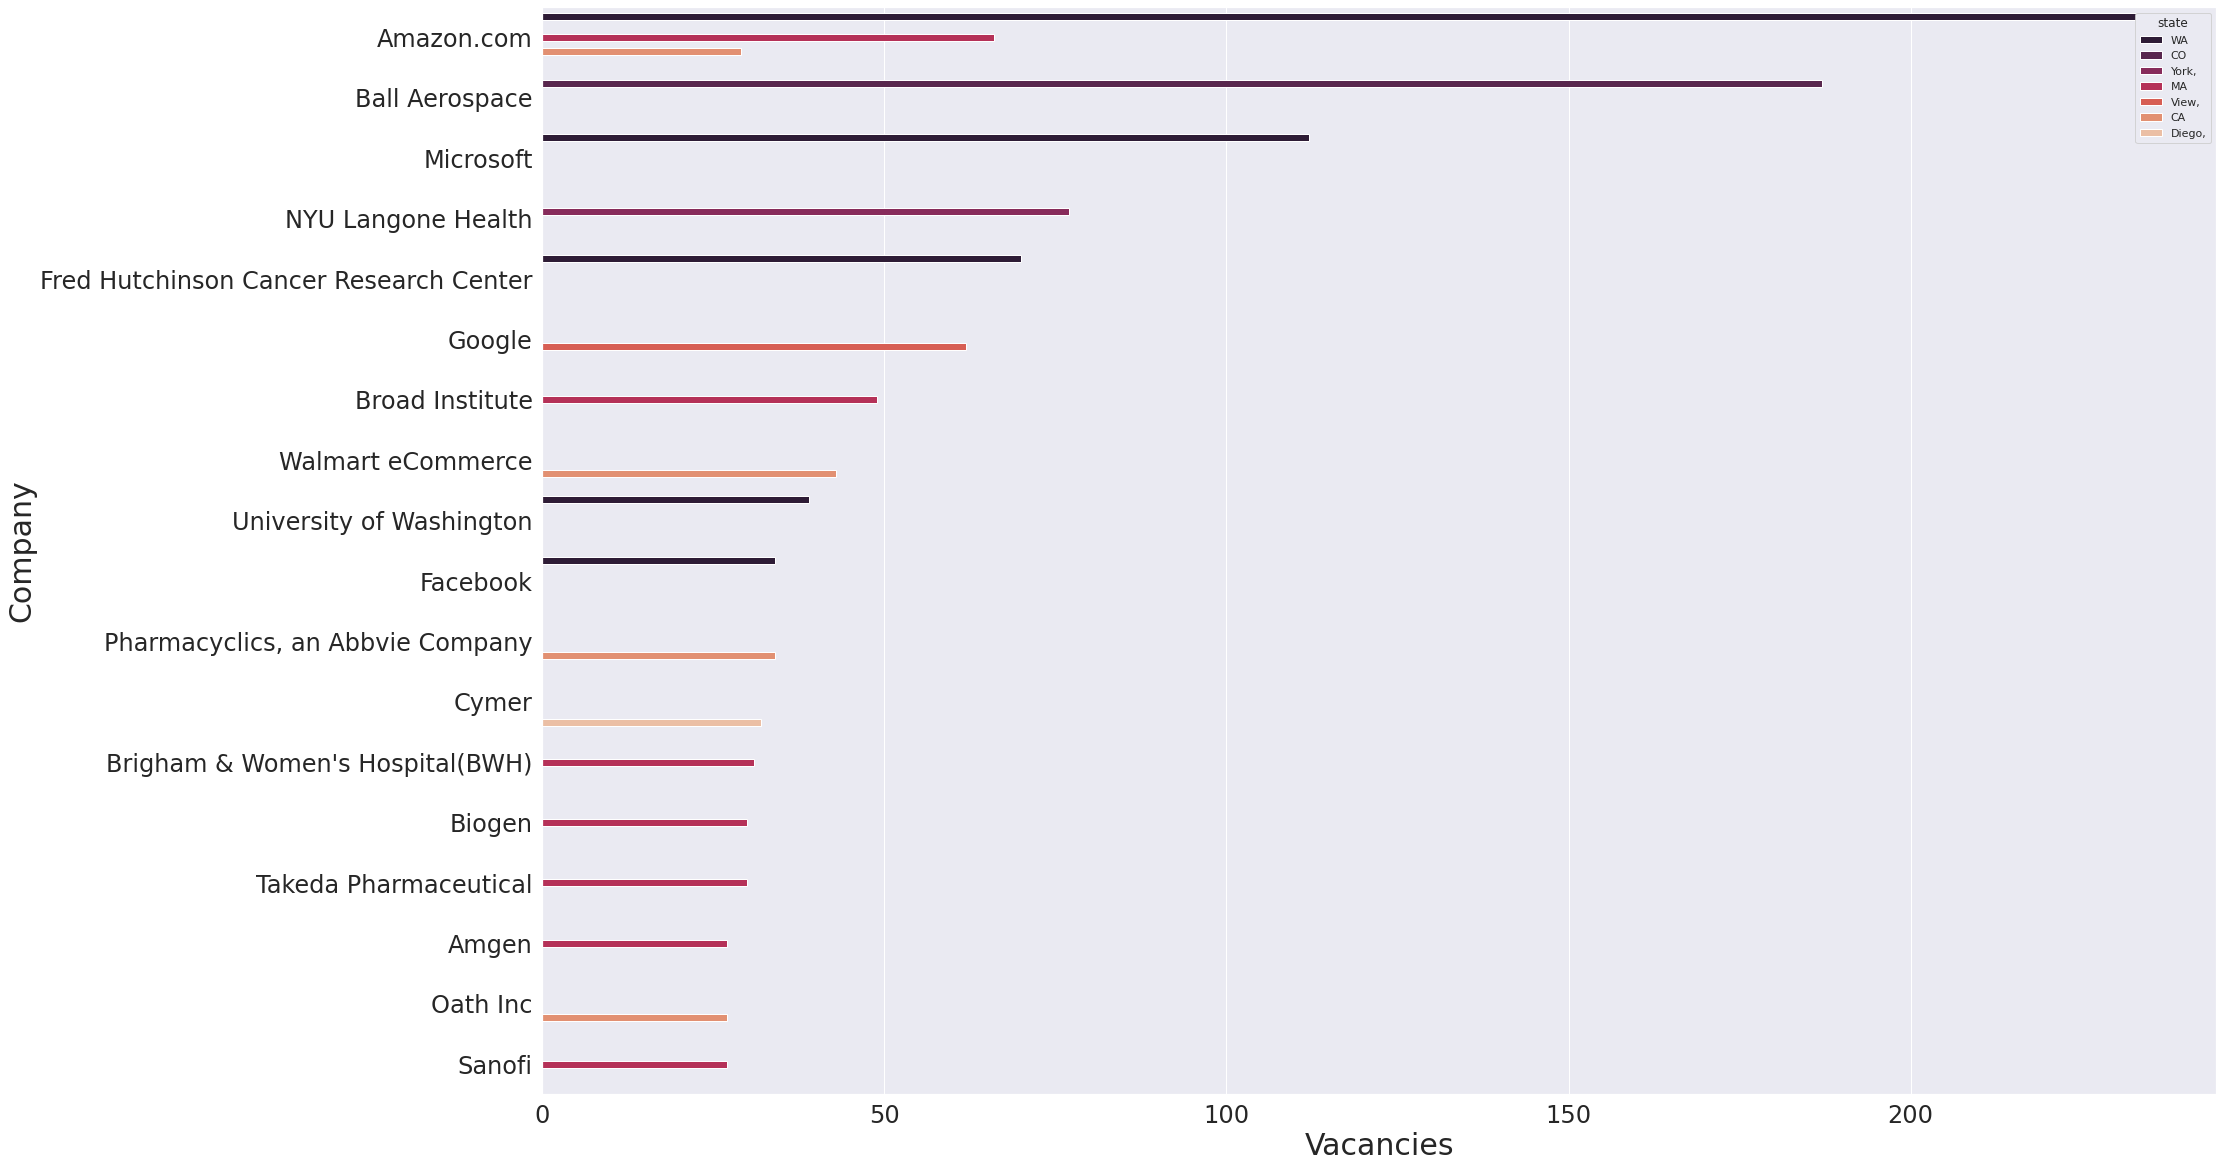

In [ ]:
df1=df.groupby(by=["company","state"]).size().reset_index(name="Positions").sort_values(by="Positions",ascending=False)

df1.head()
plt.figure(figsize=(30,20))
sns.barplot(y="company",x="Positions",hue="state",data=df1.head(20),palette="rocket")
plt.yticks(size=24)
plt.ylabel("Company",size=30)
plt.xlabel("Vacancies",size=30)
plt.xticks(size=24)

### **Number of Reviews per Position in a Company**

* Most Reviews are given by employees of Walmart on 
         * Senior Data Scientist
         * Staff Engineer
         * Information Security Risk Expert 
         * Data Scientist-ISD


(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]), <a list of 9 Text major ticklabel objects>)

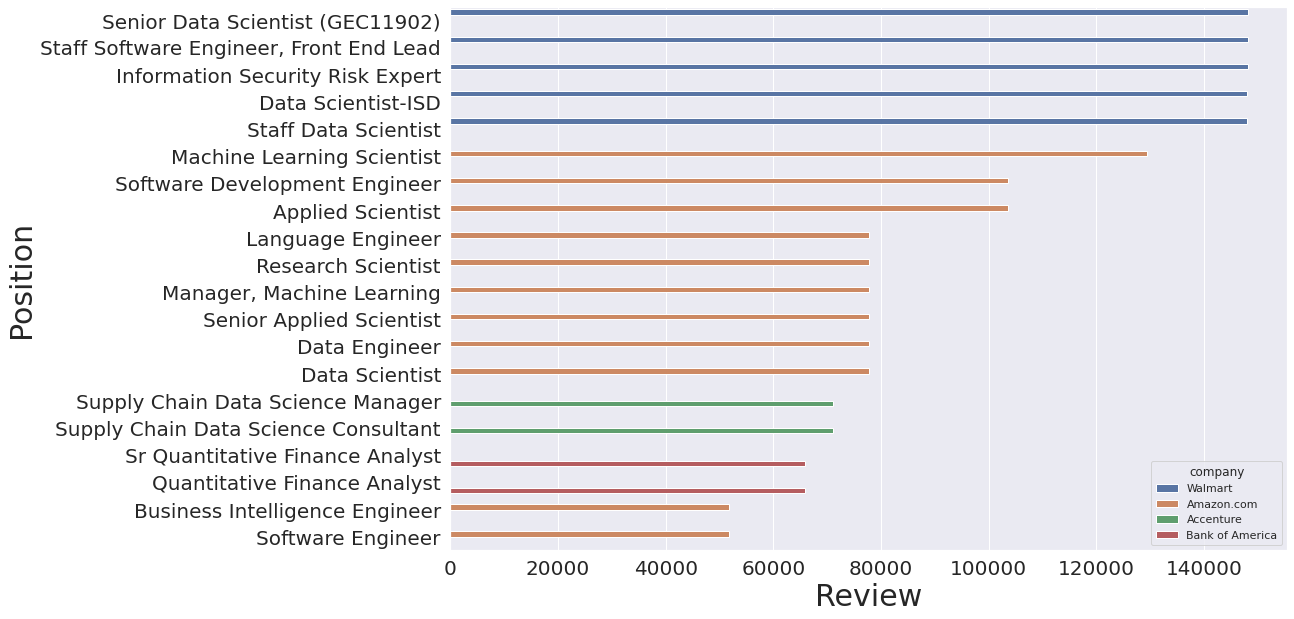

In [ ]:
df1=df.groupby(by=["company","position"])["reviews"].sum().reset_index().sort_values(by="reviews",ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(y="position",x="reviews",data=df1.head(20),hue="company")
plt.yticks(size=20)
plt.ylabel("Position",size=30)
plt.xlabel("Review",size=30)
plt.xticks(size=20)

### **Composition of Job Profile in Dataset** 

* From this we can conclude that job market is dominated by Data Scientist Job Profile followed by Research Analyst, Data Engineer and ML Engineer 



Text(0, 0.5, ' ')

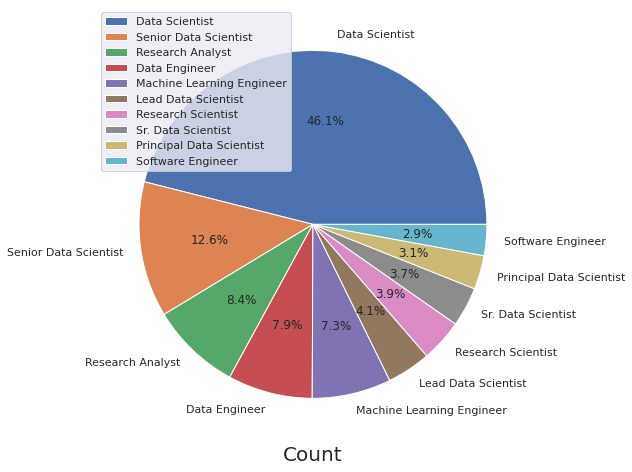

In [ ]:
top=pd.DataFrame(df.position.value_counts()[:10])
top["Position"]=top.index
top=top.rename(columns={'position':'count'})
top.plot.pie(y="count",figsize=(35,8),subplots=True,autopct='%1.1f%%',)
plt.legend(loc="upper left")
plt.yticks(size=15)
plt.xlabel("Count",size=20)
plt.ylabel(" ")

***Color Palette***

In [ ]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#F8D030',  # Electric
                    # '#E0C068',  # Ground
                    # '#EE99AC',  # Fairy
                    # '#C03028',  # Fighting
                    # '#F85888',  # Psychic
                    # '#B8A038',  # Rock
                    # '#705898',  # Ghost
                    # '#98D8D8',  # Ice
                    # '#7038F8',  # Dragon
                   ]



---



# ***Second Section***



---



### **Data Analysis on Data Scientist Profile**

In [ ]:
Data_Science=df[(df["position"]=='Data Scientist')|(df["position"]=='Senior Data Scientist')|
   (df["position"]=='Lead Data Scientist')|(df["position"]=='Sr. Data Scientist')]
skills=Data_Science.description.tolist()
Data_Science.head()

position                company  ...     city  state
2   Data Scientist         Xpert Staffing  ...  Atlanta     GA
15  Data Scientist               Cotiviti  ...  Atlanta     GA
18  Data Scientist            Relus Cloud  ...  Atlanta     GA
19  Data Scientist         Inspire Brands  ...  Atlanta     GA
22  Data Scientist  Norfolk Southern Corp  ...  Atlanta     GA

[5 rows x 7 columns]

**Word Cloud representing frequent words associated with Data Scientist Profile**

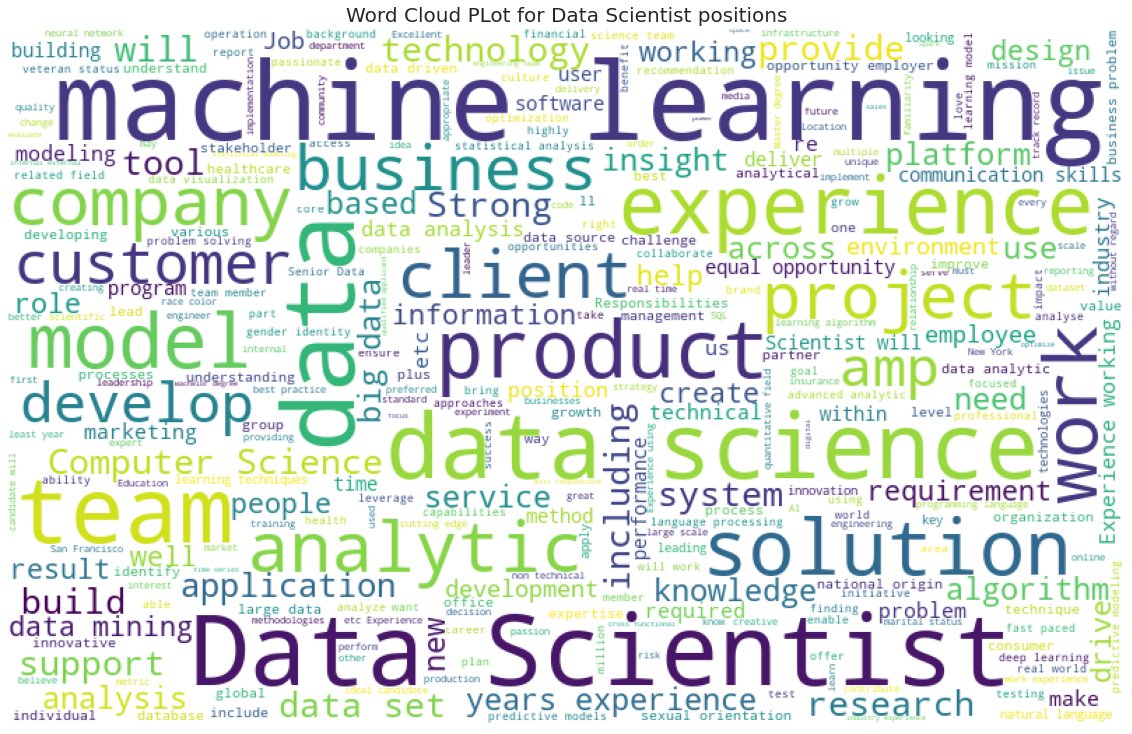

In [ ]:
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', max_words=500, 
                min_font_size = 5).generate(split_text(skills))

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Word Cloud PLot for Data Scientist positions',size=20)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

**This graph represents what fraction of Data Scientist profile requires these skills**
* From this we can conclude that most Data Scientist Profile has ML as it's primary skill requirement

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 <a list of 10 Text major ticklabel objects>)

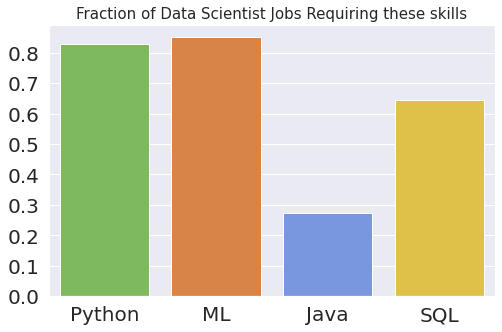

In [ ]:
sql=Data_Science[Data_Science.description.str.contains("SQL|sql")].shape[0]/Data_Science.shape[0]
python=Data_Science[Data_Science.description.str.contains("python|Python|PYTHON")].shape[0]/Data_Science.shape[0]
java=Data_Science[Data_Science.description.str.contains("java|Java|JAVA")].shape[0]/Data_Science.shape[0]
ml=Data_Science[Data_Science.description.str.contains("machine|learning|ml|ML|machine Learning|Machine Learning|Machine learning")].shape[0]/Data_Science.shape[0]
k=[python,ml,java,sql]
plt.figure(figsize=(8,5))
sns.barplot(y=k,x=["Python","ML","Java","SQL"],palette=pkmn_type_colors)

plt.title("Fraction of Data Scientist Jobs Requiring these skills",size=15)
plt.xticks(size=20)
plt.yticks(size=20)

**Number of Data Scientist Jobs per city**
* From this we can conclude that maximum number of Data Scientist Profile jobs can be found in New York

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 8 Text major ticklabel objects>)

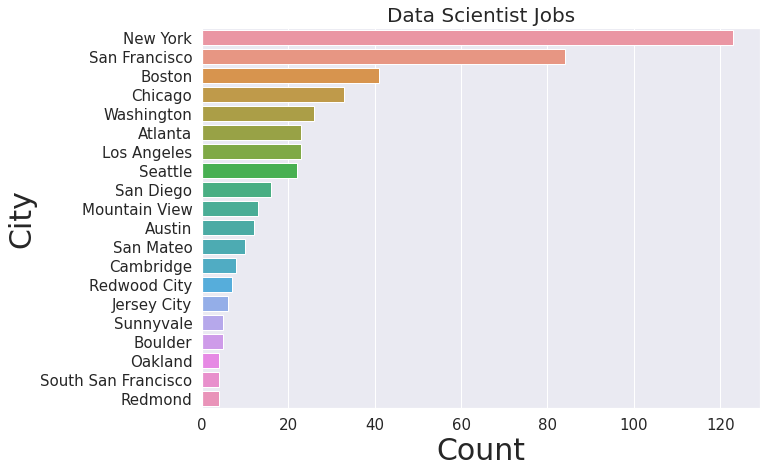

In [ ]:
df2=Data_Science.groupby(by="city").size().reset_index(name="count").sort_values(by="count",ascending=False)
df2.head(10)
plt.figure(figsize=(10,7))
plt.yticks(size=15)
sns.barplot(y="city",x="count",data=df2.head(20))
plt.title("Data Scientist Jobs",size=20)
plt.ylabel("City",size=30)
plt.xlabel("Count",size=30)
plt.xticks(size=15)

### **Data Analysis on ML Engineer Profile**

In [ ]:
ML_eng=df[(df["position"]=='Machine Learning Engineer')]
skills_ml_eng=ML_eng.description.tolist()
ML_eng.head()

position          company  ...    city  state
328  Machine Learning Engineer  Keller Williams  ...  Austin     TX
809  Machine Learning Engineer      Pluralsight  ...  Boston     MA
814  Machine Learning Engineer          Klaviyo  ...  Boston     MA
822  Machine Learning Engineer           Soroco  ...  Boston     MA
827  Machine Learning Engineer          Spotify  ...  Boston     MA

[5 rows x 7 columns]

**Word Cloud representing frequent words associated with ML Engineer Profile**

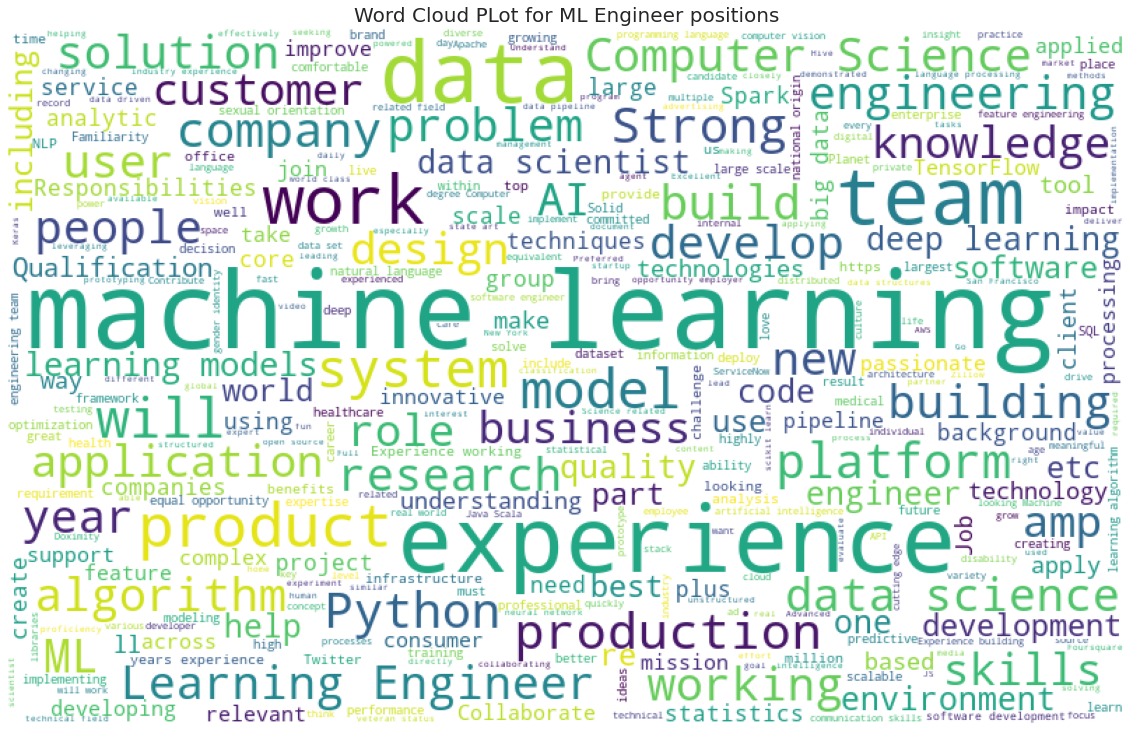

In [ ]:
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white',max_words=500,
                min_font_size = 5).generate(split_text(skills_ml_eng))

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Word Cloud PLot for ML Engineer positions',size=20)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

**This graph represents what fraction of ML Engineer profile requires these skills**
* From this we can conclude that most ML Engineer Profile also has ML as it's primary skill requirement

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text major ticklabel objects>)

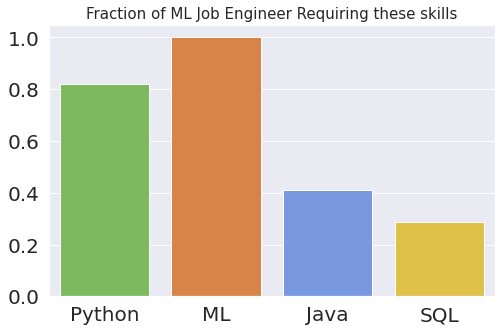

In [ ]:
sql=ML_eng[ML_eng.description.str.contains("SQL|sql")].shape[0]/ML_eng.shape[0]
python=ML_eng[ML_eng.description.str.contains("python|Python|PYTHON")].shape[0]/ML_eng.shape[0]
java=ML_eng[ML_eng.description.str.contains("java|Java|JAVA")].shape[0]/ML_eng.shape[0]
ml=ML_eng[ML_eng.description.str.contains("machine|learning|ml|ML|machine Learning|Machine Learning|Machine learning")].shape[0]/ML_eng.shape[0]

k=[python,ml,java,sql]
plt.figure(figsize=(8,5))
sns.barplot(y=k,x=["Python","ML","Java","SQL"],palette=pkmn_type_colors)

plt.title("Fraction of ML Job Engineer Requiring these skills",size=15)
plt.xticks(size=20)
plt.yticks(size=20)

**Number of ML Engineer Jobs per city**
* From this we can conclude that maximum number of ML Engineer Profile jobs can be found in San Francisco

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 9 Text major ticklabel objects>)

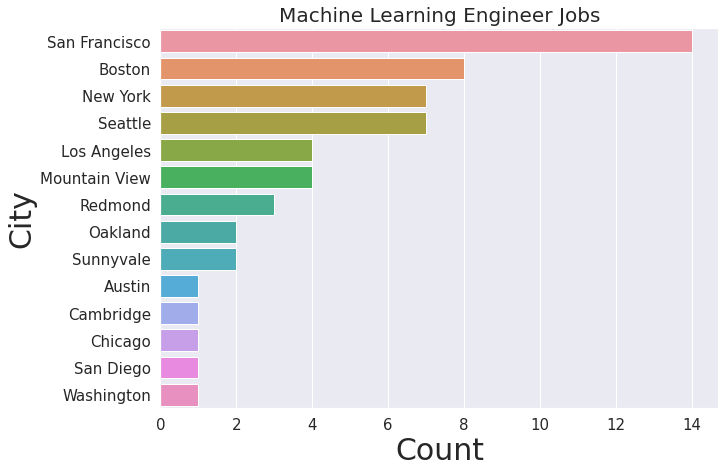

In [ ]:
df3=ML_eng.groupby(by="city").size().reset_index(name="count").sort_values(by="count",ascending=False)
df3.head(10)
plt.figure(figsize=(10,7))
plt.yticks(size=15)
sns.barplot(y="city",x="count",data=df3.head(20))
plt.title("Machine Learning Engineer Jobs",size=20)
plt.ylabel("City",size=30)
plt.xlabel("Count",size=30)
plt.xticks(size=15)

### **Data Analysis on Data Engineer Profile**

In [ ]:
Data_eng=df[(df["position"]=='Data Engineer')]
skills_data_eng=Data_eng.description.tolist()
Data_eng.head()

position                   company  ...     city  state
61   Data Engineer                    Gallup  ...  Atlanta     GA
755  Data Engineer  Partners HealthCare(PHS)  ...   Boston     MA
793  Data Engineer              Cervello Inc  ...   Boston     MA
798  Data Engineer    Vertex Pharmaceuticals  ...   Boston     MA
799  Data Engineer                    Vertex  ...   Boston     MA

[5 rows x 7 columns]

**Word Cloud representing frequent words associated with Data Engineer Profile**

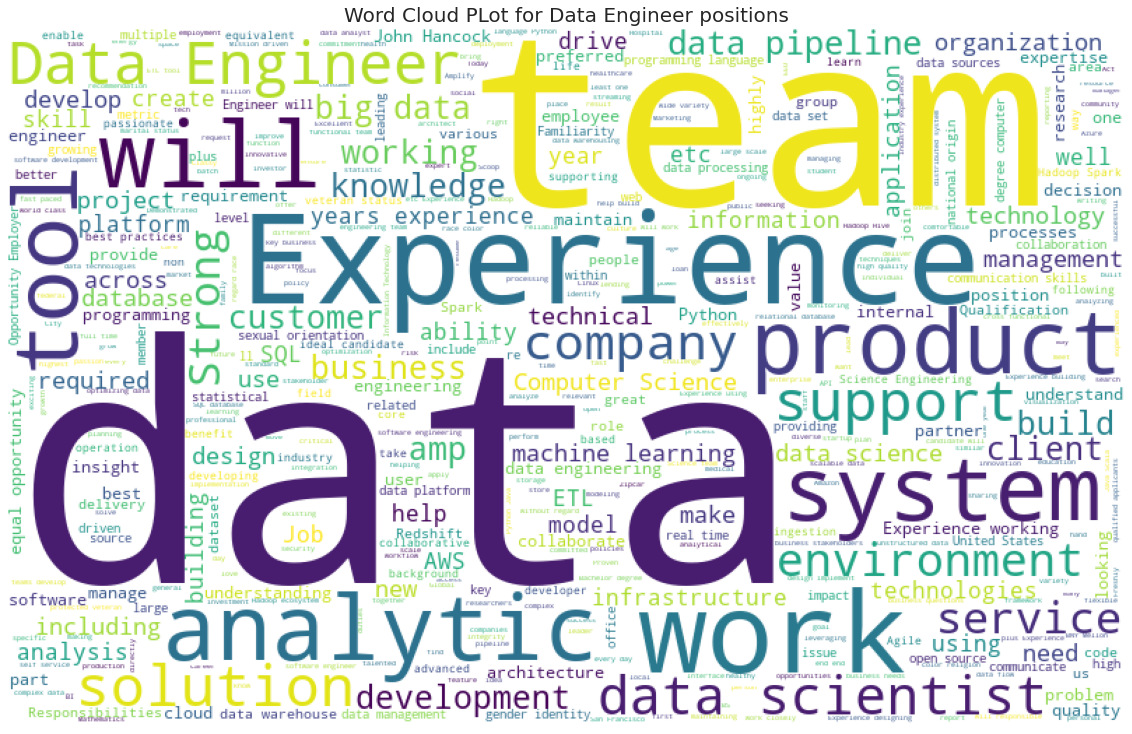

In [ ]:
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white',contour_color='black', max_words=500, 
                min_font_size = 5).generate(split_text(skills_data_eng))

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Word Cloud PLot for Data Engineer positions',size=20)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

**This graph represents what fraction of Data Engineer profile requires these skills**
* From this we can conclude that most Data Engineer Profile has Python as it's primary skill requirement

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

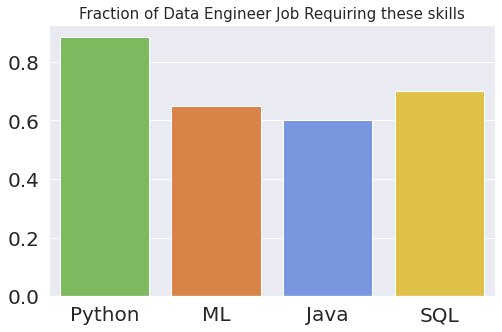

In [ ]:
sql=Data_eng[Data_eng.description.str.contains("SQL|sql")].shape[0]/Data_eng.shape[0]
python=Data_eng[Data_eng.description.str.contains("python|Python|PYTHON")].shape[0]/Data_eng.shape[0]
java=Data_eng[Data_eng.description.str.contains("java|Java|JAVA")].shape[0]/Data_eng.shape[0]
ml=Data_eng[Data_eng.description.str.contains("machine|learning|ml|ML|machine Learning|Machine Learning|Machine learning")].shape[0]/Data_eng.shape[0]

k=[python,ml,java,sql]
plt.figure(figsize=(8,5))
sns.barplot(y=k,x=["Python","ML","Java","SQL",],palette=pkmn_type_colors)

plt.title("Fraction of Data Engineer Job Requiring these skills",size=15)
plt.xticks(size=20)
plt.yticks(size=20)

**Number of Data Engineer Jobs per city**
* From this we can conclude that maximum number of Data Engineer Profile jobs can be found in New York

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text major ticklabel objects>)

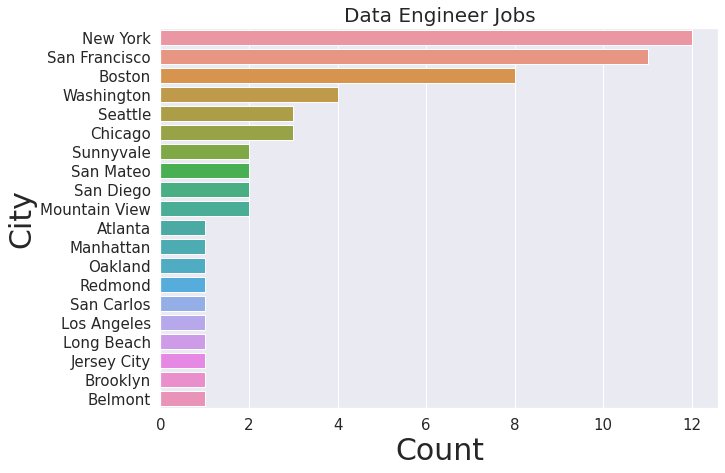

In [ ]:
df4=Data_eng.groupby(by="city").size().reset_index(name="count").sort_values(by="count",ascending=False)
df4.head(10)
plt.figure(figsize=(10,7))
plt.yticks(size=15)
sns.barplot(y="city",x="count",data=df4.head(20))
plt.title("Data Engineer Jobs",size=20)
plt.ylabel("City",size=30)
plt.xlabel("Count",size=30)
plt.xticks(size=15)

### **Data Analysis on Analyst Profile**

In [ ]:
Analyst=df[df.position.str.contains("analyst|Analyst")]
skill_Analyst=Analyst.description.tolist()
Analyst.head()

position  ... state
3                                        Data Analyst  ...    GA
8                       Analyst - CIB Credit Research  ...    GA
14  Business Intelligence Data Science Analyst - S...  ...    GA
53                                Statistical Analyst  ...    GA
64                   Statistical Quantitative Analyst  ...    GA

[5 rows x 7 columns]

**Word Cloud representing frequent words associated with Analyst Profile**

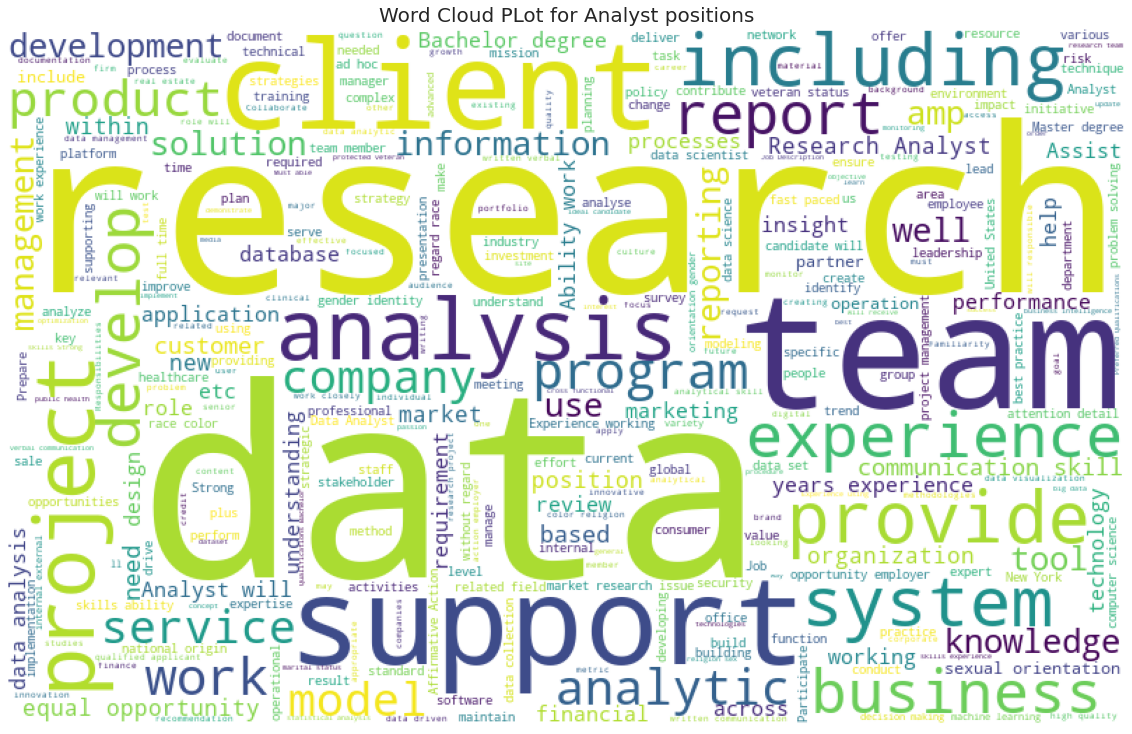

In [ ]:
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white',max_words=500,  
                min_font_size = 5).generate(split_text(skill_Analyst))

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Word Cloud PLot for Analyst positions',size=20)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

**This graph represents what fraction of Analyst profile requires these skills**
* From this we can conclude that most Analyst Profile has SQL as it's primary skill requirement

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
 <a list of 9 Text major ticklabel objects>)

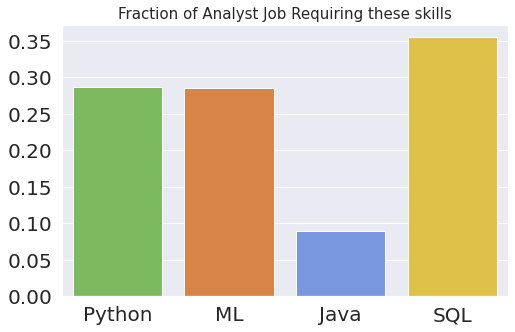

In [ ]:
sql=Analyst[Analyst.description.str.contains("SQL|sql")].shape[0]/Analyst.shape[0]
python=Analyst[Analyst.description.str.contains("python|Python|PYTHON")].shape[0]/Analyst.shape[0]
java=Analyst[Analyst.description.str.contains("java|Java|JAVA")].shape[0]/Analyst.shape[0]
ml=Analyst[Analyst.description.str.contains("machine|learning|ml|ML|machine Learning|Machine Learning|Machine learning")].shape[0]/Analyst.shape[0]

k=[python,ml,java,sql]
plt.figure(figsize=(8,5))

sns.barplot(y=k,x=["Python","ML","Java","SQL"],palette=pkmn_type_colors,capsize=1)

plt.title("Fraction of Analyst Job Requiring these skills",size=15)
plt.xticks(size=20)
plt.yticks(size=20)

**Number of Analyst Jobs per city**
* From this we can conclude that maximum number of Analyst Profile jobs can be found in New York

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text major ticklabel objects>)

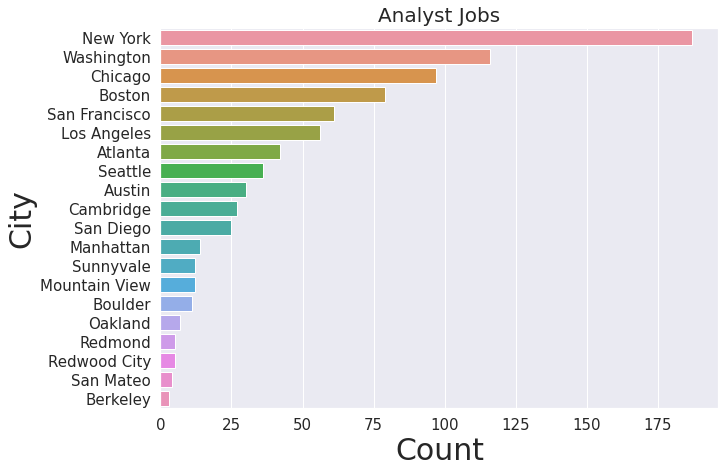

In [ ]:
df5=Analyst.groupby(by="city").size().reset_index(name="count").sort_values(by="count",ascending=False)
df5.head(10)
plt.figure(figsize=(10,7))
plt.yticks(size=15)
sns.barplot(y="city",x="count",data=df5.head(20))
plt.title("Analyst Jobs",size=20)
plt.ylabel("City",size=30)
plt.xlabel("Count",size=30)
plt.xticks(size=15)

### **Data Analysis on Data Analyst Profile**

In [ ]:
Data_Analyst=df[(df["position"]=='Data Analyst')]
skill_Data_Analyst=Data_Analyst.description.tolist()
Data_Analyst.head()

position               company  ...         city     state
3     Data Analyst        Operation HOPE  ...      Atlanta        GA
298   Data Analyst  Applied Systems Inc.  ...       Austin        TX
1363  Data Analyst            TrueMotion  ...       Boston        MA
2247  Data Analyst      Uptown Treehouse  ...  Los Angeles  Angeles,
2498  Data Analyst            Amazon.com  ...    Cambridge        MA

[5 rows x 7 columns]

**Word Cloud representing frequent words associated with Data Analyst Profile**

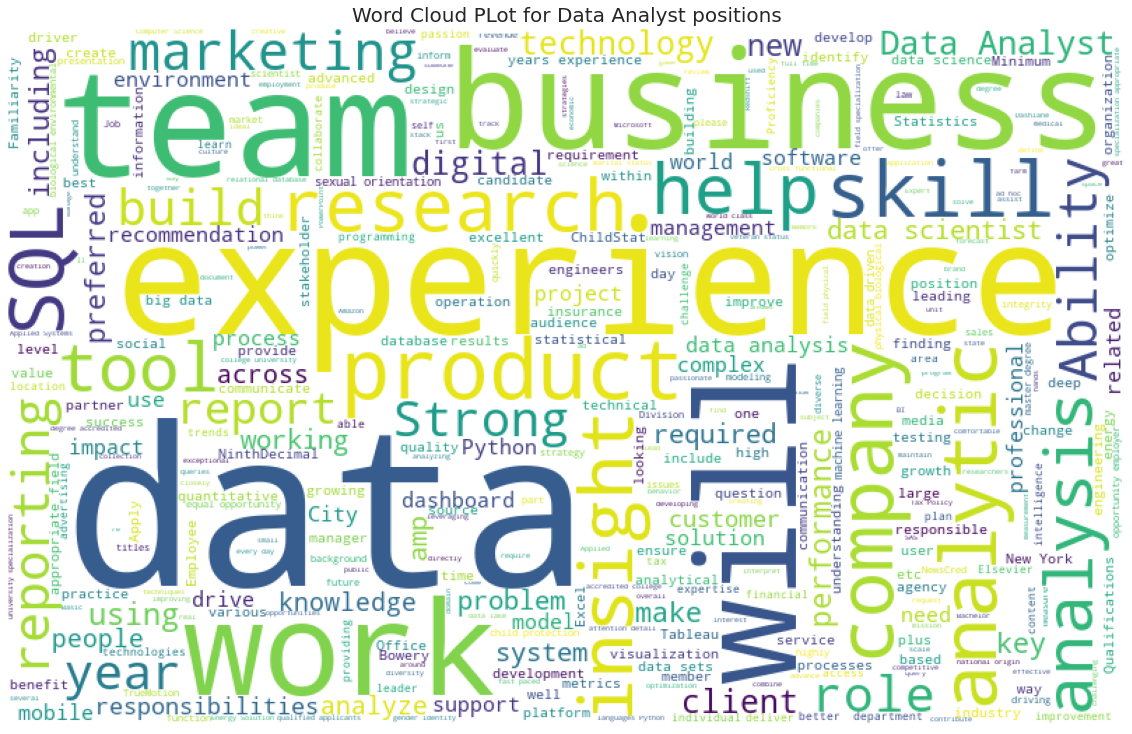

In [ ]:
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white',max_words=500,  
                min_font_size = 5).generate(split_text(skill_Data_Analyst))

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Word Cloud PLot for Data Analyst positions',size=20)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

**This graph represents what fraction of Data Analyst profile requires these skills**
* From this we can conclude that most Analyst Profile has SQL as it's primary skill requirement

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

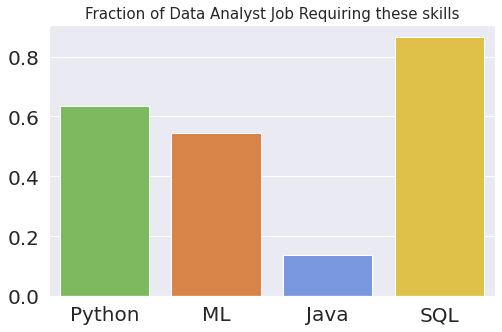

In [ ]:
sql=Data_Analyst[Data_Analyst.description.str.contains("SQL|sql")].shape[0]/Data_Analyst.shape[0]
python=Data_Analyst[Data_Analyst.description.str.contains("python|Python|PYTHON")].shape[0]/Data_Analyst.shape[0]
java=Data_Analyst[Data_Analyst.description.str.contains("java|Java|JAVA")].shape[0]/Data_Analyst.shape[0]
ml=Data_Analyst[Data_Analyst.description.str.contains("machine|learning|ml|ML|machine Learning|Machine Learning|Machine learning")].shape[0]/Data_Analyst.shape[0]

k=[python,ml,java,sql]
plt.figure(figsize=(8,5))

sns.barplot(y=k,x=["Python","ML","Java","SQL"],palette=pkmn_type_colors,capsize=1)

plt.title("Fraction of Data Analyst Job Requiring these skills",size=15)
plt.xticks(size=20)
plt.yticks(size=20)

**Number of Data Analyst Jobs per city**
* From this we can conclude that maximum number of Data Analyst Profile jobs can be found in New York

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 9 Text major ticklabel objects>)

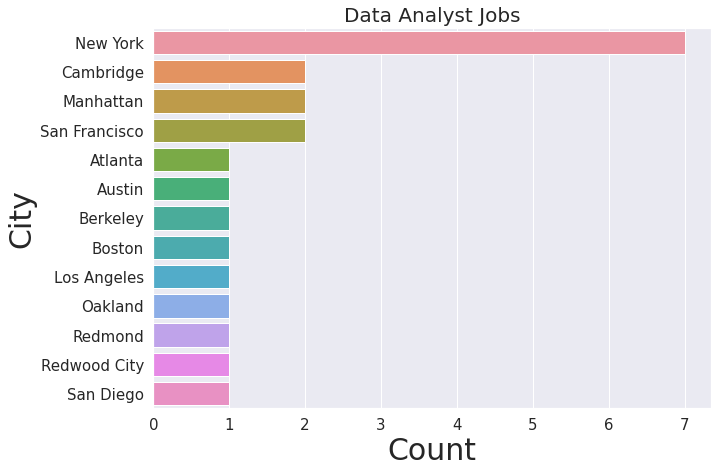

In [ ]:
df6=Data_Analyst.groupby(by="city").size().reset_index(name="count").sort_values(by="count",ascending=False)
df6.head(10)
plt.figure(figsize=(10,7))
plt.yticks(size=15)
sns.barplot(y="city",x="count",data=df6.head(20))
plt.title("Data Analyst Jobs",size=20)
plt.ylabel("City",size=30)
plt.xlabel("Count",size=30)
plt.xticks(size=15)

### **Data Analysis on Software Engineer Profile**

In [ ]:
software_eng=df[(df["position"]=='Software Engineer')]
skills_software=software_eng.description.tolist()
software_eng.head()

position             company  ...     city  state
154   Software Engineer          FraudScope  ...  Atlanta     GA
870   Software Engineer           Schireson  ...   Boston     MA
1220  Software Engineer  Harvard University  ...   Boston     MA
1617  Software Engineer             Nielsen  ...  Chicago     IL
1745  Software Engineer       Label Insight  ...  Chicago     IL

[5 rows x 7 columns]

**Word Cloud representing frequent words associated with Software Engineer Profile**

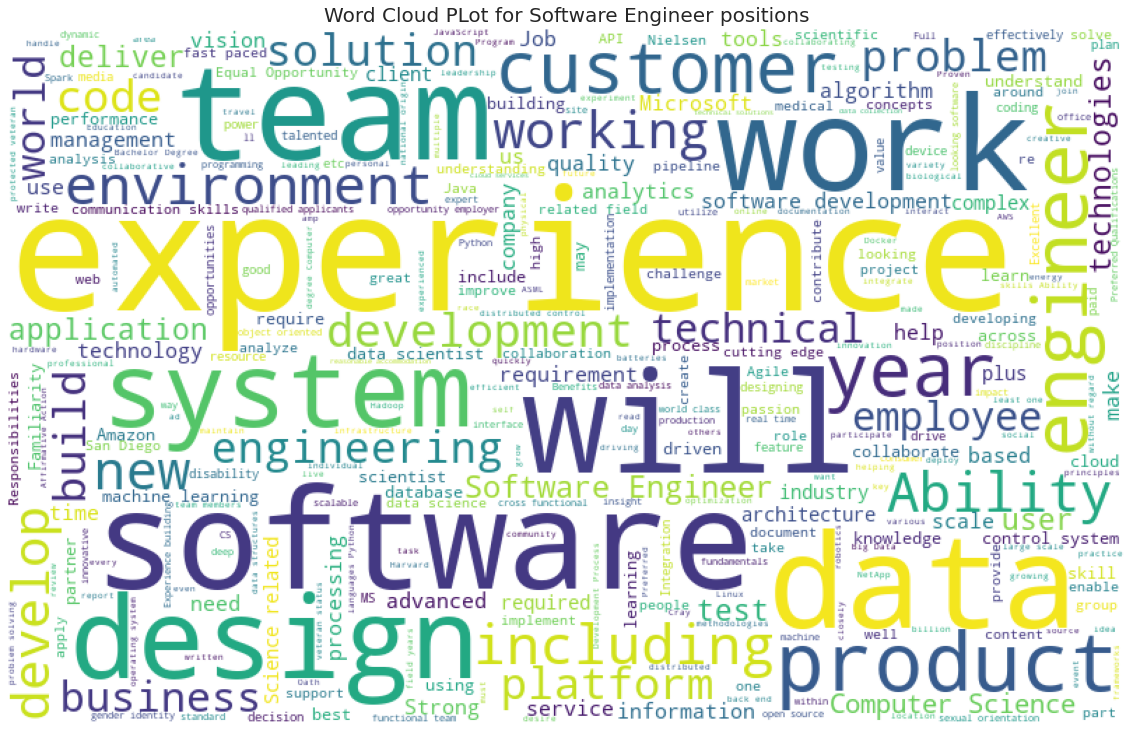

In [ ]:
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', max_words = 500,  
                min_font_size = 5).generate(split_text(skills_software))

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Word Cloud PLot for Software Engineer positions',size=20)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

**This graph represents what fraction of Software Engineer profile requires these skills**
* From this we can conclude that most Software Engineers Profile has ML as it's primary skill requirement

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
 <a list of 9 Text major ticklabel objects>)

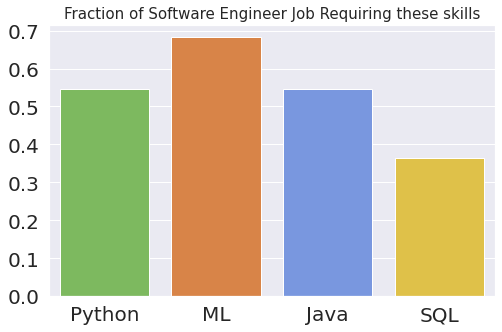

In [ ]:
sql=software_eng[software_eng.description.str.contains("SQL|sql")].shape[0]/software_eng.shape[0]
python=software_eng[software_eng.description.str.contains("python|Python|PYTHON")].shape[0]/software_eng.shape[0]
java=software_eng[software_eng.description.str.contains("java|Java|JAVA")].shape[0]/software_eng.shape[0]
ml=software_eng[software_eng.description.str.contains("machine|learning|ml|ML|machine Learning|Machine Learning|Machine learning")].shape[0]/software_eng.shape[0]
k=[python,ml,java,sql]
plt.figure(figsize=(8,5))

sns.barplot(y=k,x=["Python","ML","Java","SQL"],palette=pkmn_type_colors,capsize=1)

plt.title("Fraction of Software Engineer Job Requiring these skills",size=15)
plt.xticks(size=20)
plt.yticks(size=20)

**Number of Software Engineer Jobs per city**
* From this we can conclude that maximum number of Software Engineer Profile jobs can be found in Sunnyvale

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 <a list of 10 Text major ticklabel objects>)

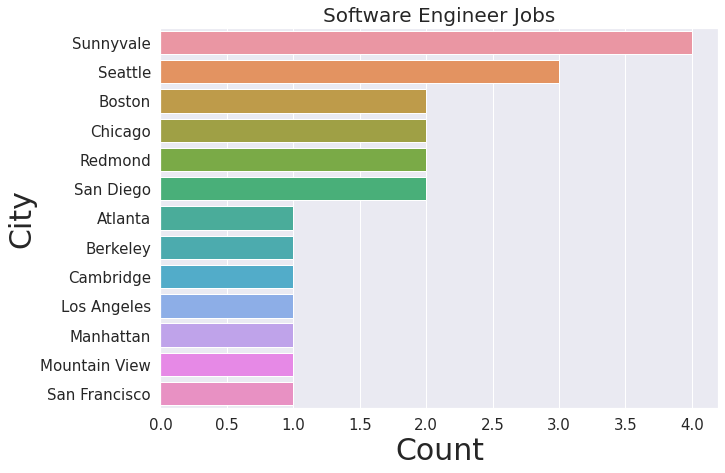

In [ ]:
df7=software_eng.groupby(by="city").size().reset_index(name="count").sort_values(by="count",ascending=False)
df7.head(10)
plt.figure(figsize=(10,7))
plt.yticks(size=15)
sns.barplot(y="city",x="count",data=df7.head(20))
plt.title("Software Engineer Jobs",size=20)
plt.ylabel("City",size=30)
plt.xlabel("Count",size=30)
plt.xticks(size=15)